# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd
from scipy import linalg

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
u

array([[-0.48835631, -0.87264432],
       [-0.87264432,  0.48835631]])

In [3]:
s

array([1.02285697, 0.11731846])

In [4]:
vh

array([[-0.38900195, -0.92123693],
       [ 0.92123693, -0.38900195]])

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [5]:
def svd_validation(A):
    B=np.zeros(A.shape) # Creamos la matriz que posteriormente rellenaremos
    u, s, v= svd(A)
    for i in range(min(A.shape)): # Simil a la sumatoria hasta la menor de las dimensiones de la matriz
        B=B+s[i]*u[:,i:i+1]*v[i:i+1,:] # Desarrollo del argumento por fila/columna
    return np.allclose(B, A)

In [6]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)


True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

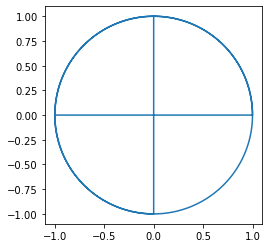

In [9]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [10]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


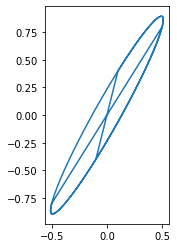

In [11]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [12]:
u, s, vh = svd(A)
# Vamos a pasar el arreglo de los valores propios a una matriz diagonal!
Sig=np.identity(len(s)) # Que la matriz sea la identidad nxn con n la dimension del arreglo con los valores propios
Sig=Sig*s.T # Que cada i-elemento de la matriz sea multiplicada por el i-valorpropio correspondiente
print(s)
Sig

[1.02285697 0.11731846]


array([[1.02285697, 0.        ],
       [0.        , 0.11731846]])

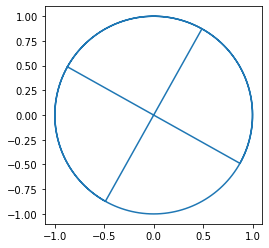

In [13]:
show_circle(u @ circle)

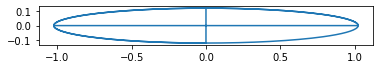

In [14]:
show_circle(Sig @ circle)

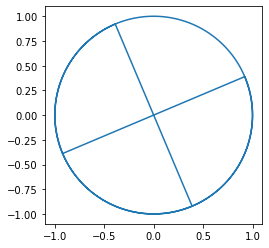

In [15]:
show_circle(vh @ circle)

__Respuesta:__ Si influye que las matrices sean unitarias, en particular las matrices de rotaciones usan cosenos y senos para generar la unicidad de la matriz, como el grupo SU(2). En particular la unicidad permite que la figura no se agrande ni se achique, algo asi como una homotecia con constante 1.

Para la primera pregunta, las matrices U y VH rotan la figura en distintas direcciones para el caso 2D, algo asi como a la izquiera y a la derecha respectivamente. Por otro lado, la matriz con los valores propios en la diagonal estan cambiando nuestra base canonica a la base de los valores propios, es decir estamos haciendo un cambio de variable para el plano cartesiano.

__Respuesta:__ Hay un tema medio algebrista detras de las matrices de rotaciones, en particular una cadena de matrices de rotaciones se pueden escribir como una sola matriz de rotacion (Ver angulos de euler para darse una idea, que es bien interesante ademas) . La descomposicion de la matriz basicamente nos separan esta rotacion final como: La matriz de rotacion a la izquierda, la de rotacion a la derecha y la matriz de homotecia, que en este caso nos transforma la circunferencia en elipse!, note que al aplicar la multiplicacion de las matrices aplicado sobre la circunferencia se tiene:

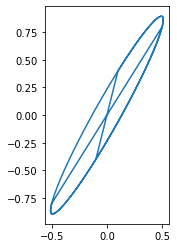

In [16]:
show_circle(u@Sig@vh @ circle)

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [17]:
from pathlib import Path
from PIL import Image

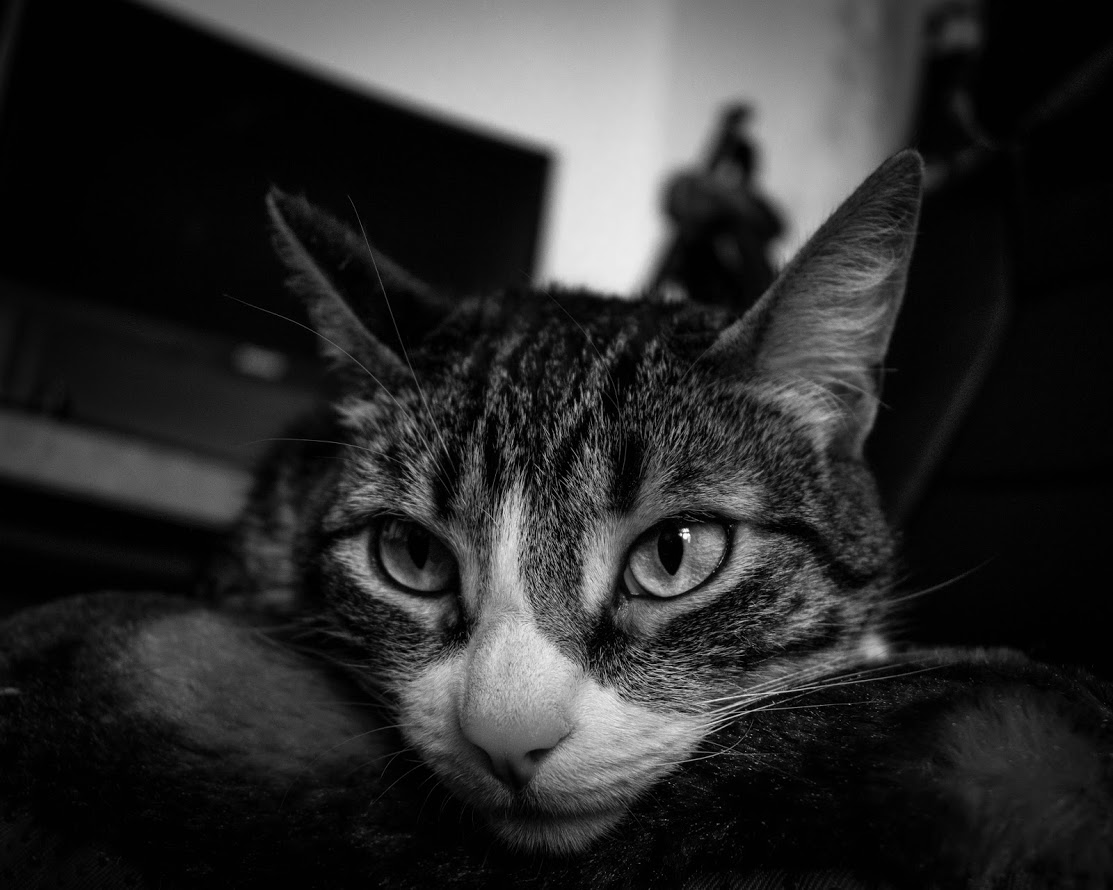

In [18]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [19]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [20]:
def low_rank_svd_approximation(A, l):
    B=np.zeros(A.shape)
    u, s, v= svd(A)
    
    if l>min(A.shape): # Si es que no se cumple que l <= rank(A)
        raise Exception("No se puede aproximar, l es mayor que las dos dimensiones de la matriz")

    else:    # Hacer la imagen
        for i in range(l):
            B=B+s[i]*u[:,i:i+1]*v[i:i+1,:]
        Fro=linalg.norm(B, 'fro')
        print(f"El error es {Fro}")
        return B

El error es 72547.5972829179


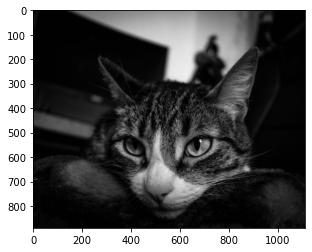

In [21]:
cat10 = low_rank_svd_approximation(cat_np, l=890)
plt.imshow(cat10, cmap='gray');

El error es 72089.01438021177


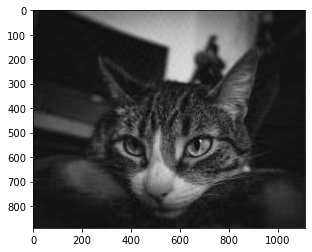

In [22]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [23]:
def low_rank_svd_tol_approximation(A, tol):
    B=np.zeros(A.shape)
    u, s, v= svd(A)
    l=0
    error = tol+2346 # Nos permite la desigualdad del while
    denominador=((s**2).sum())**.5 # Ahorro de calculo para despues
    
    while error > tol:
        error=((s[l:]**2).sum())**.5/denominador # Espresion con los sigma del enunciado
        l=l+1 # Nos permite recorrer la matriz
    print(f"El error es {error}")  
    
    if l>min(A.shape): # Si es que no se cumple que l <= rank(A)
        raise Exception("No se puede aproximar, l es mayor que las dos dimensiones de la matriz")

    else:    # Hacer la imagen
        for i in range(l-1):
            B=B+s[i]*u[:,i:i+1]*v[i:i+1,:]
        return B

El error es 0.09940298949609147


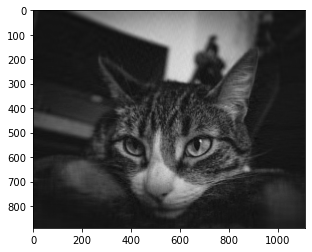

In [24]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El error es 0.00994738863466427


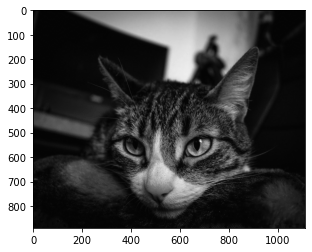

In [25]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

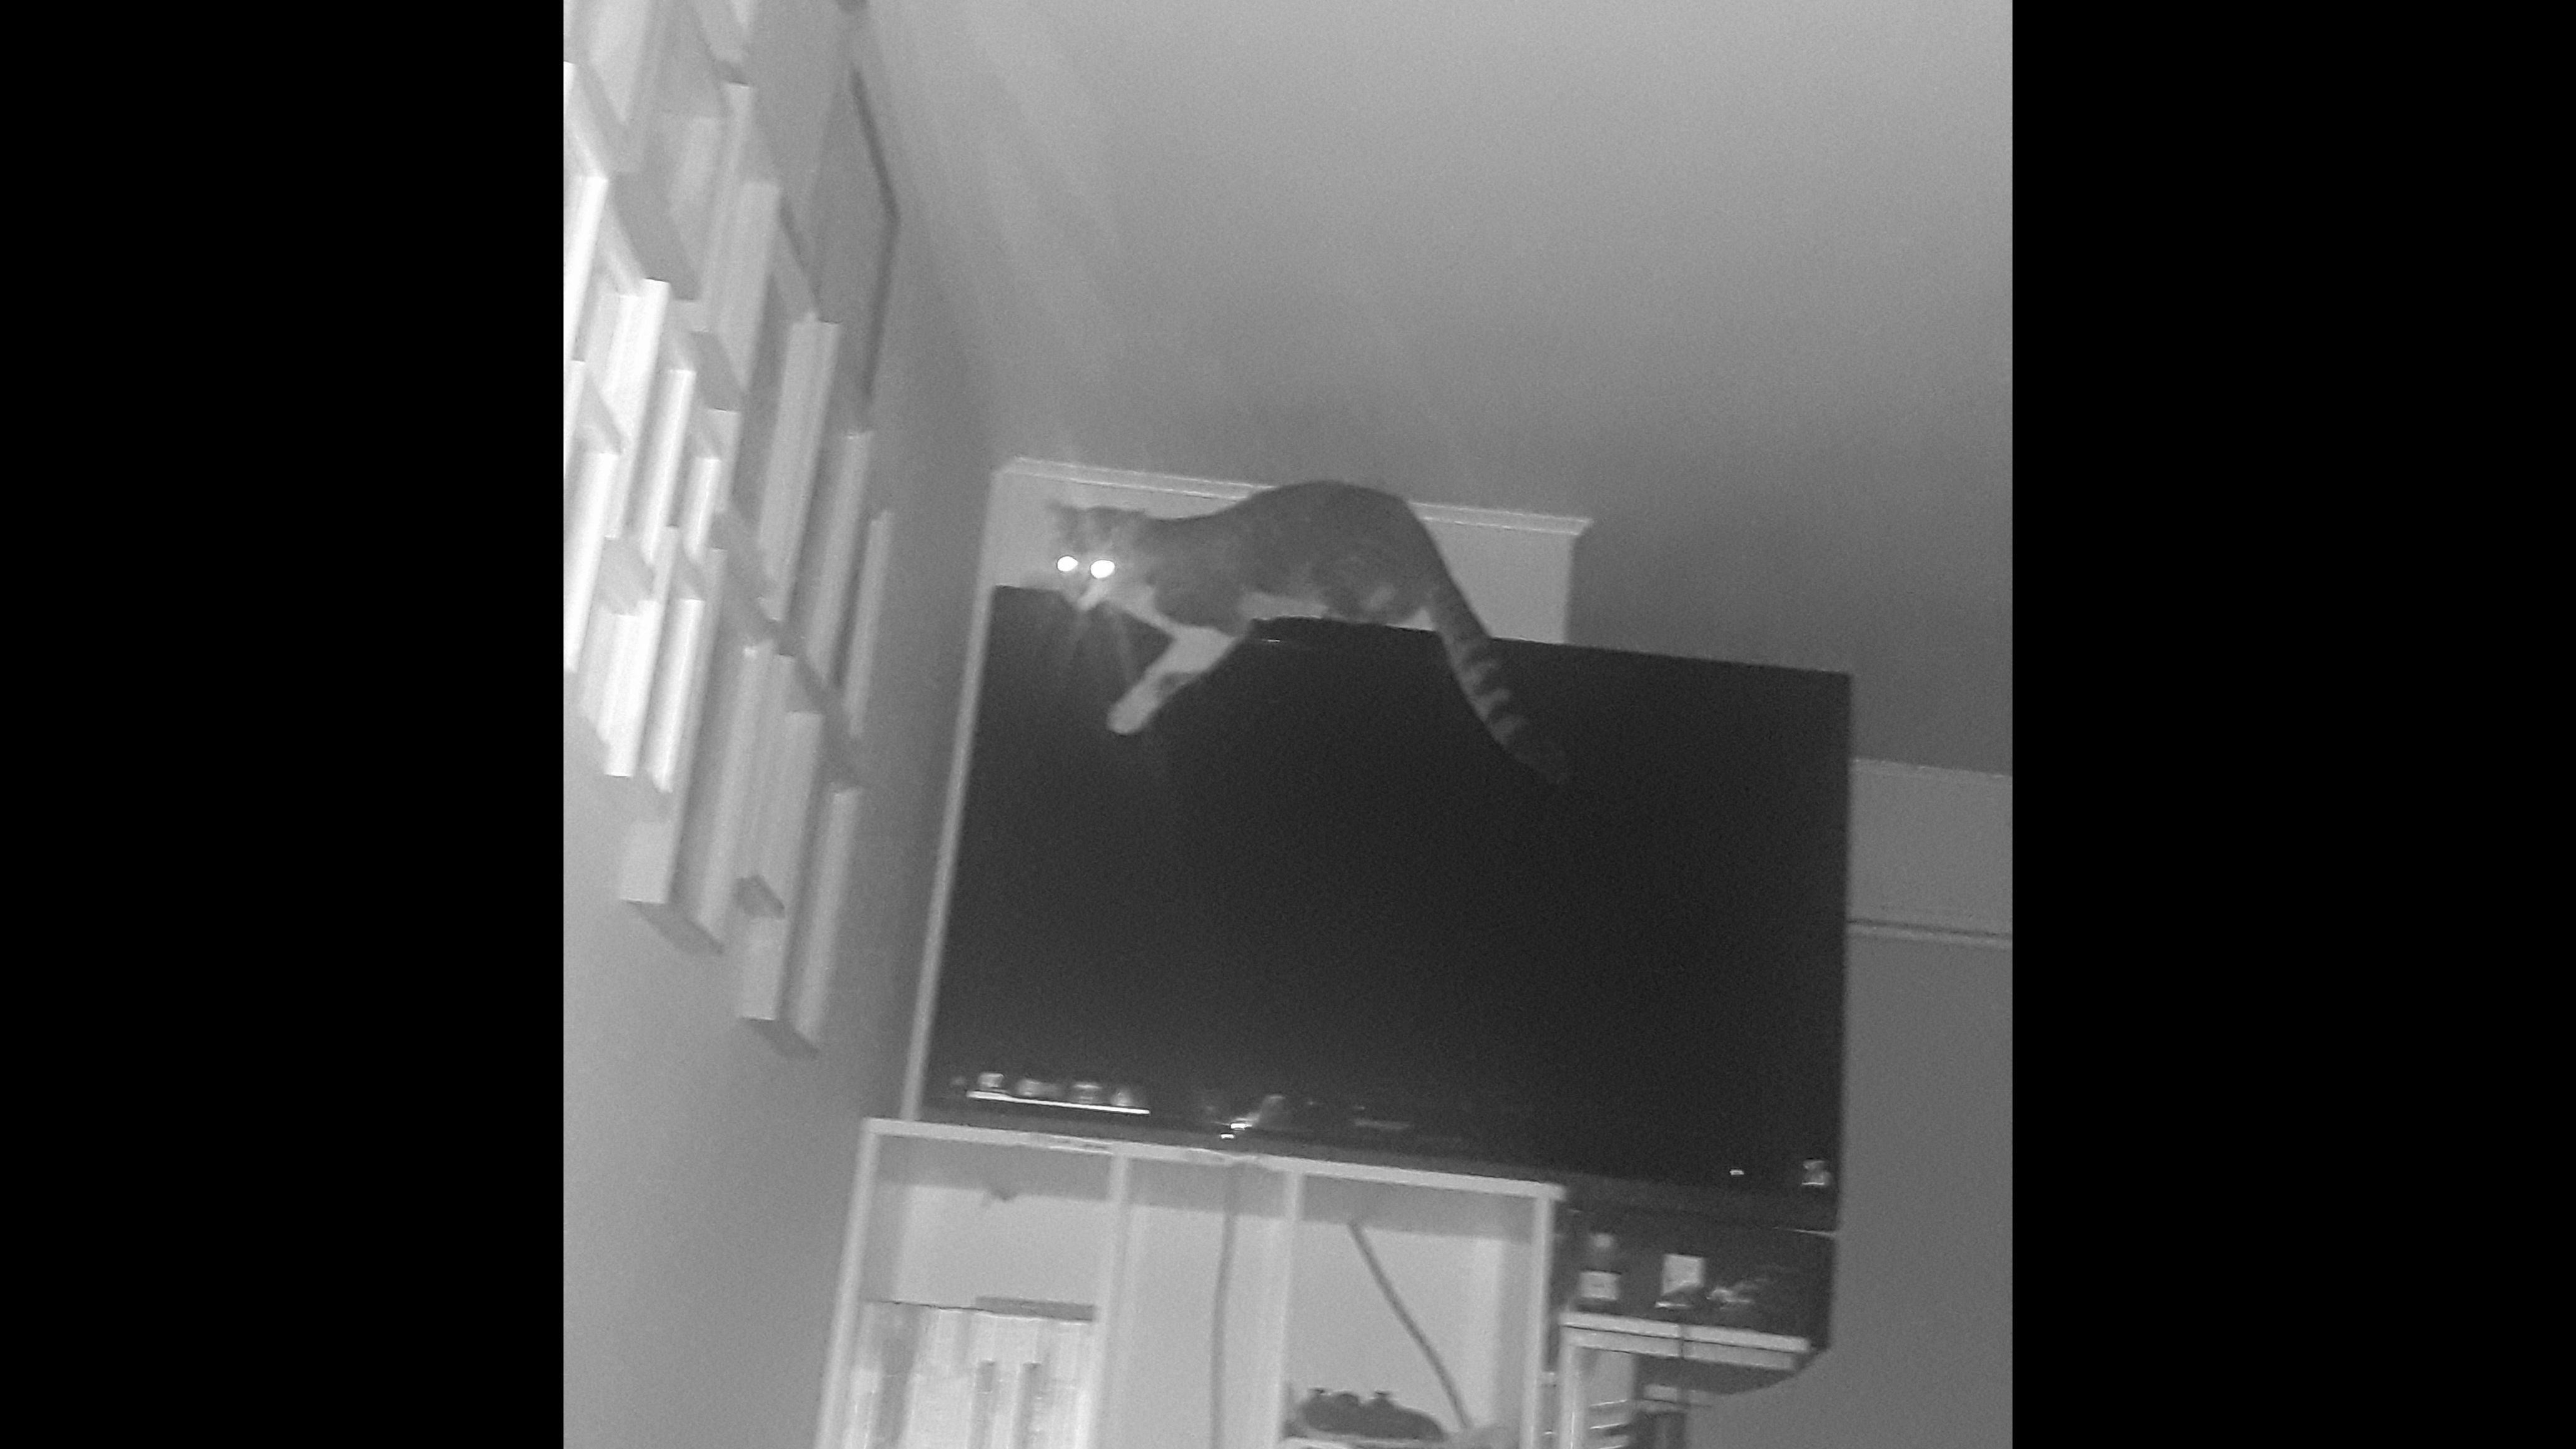

In [26]:
your_img_name = "oscarito.jpeg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L').rotate(-90)
your_img

In [27]:
your_img_np = np.array(your_img)

El error es 309508.79088519205


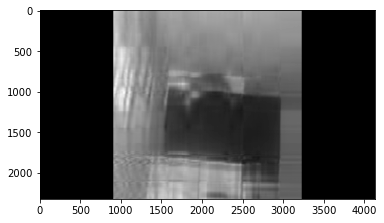

In [28]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error es 309874.6709445994


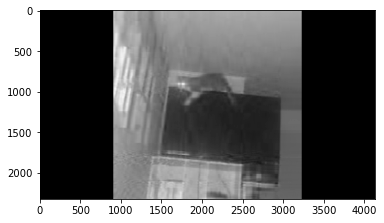

In [29]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El error es 0.09964464149547037


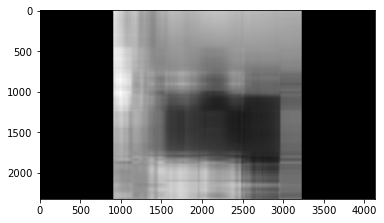

In [30]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El error es 0.009992111635487516


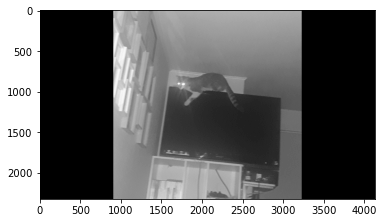

In [31]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Supongo que pedagogicamente si, pero deben haber algoritmos mucho mas eficientes pasa usar menos memoria/operaciones, sobretodo si las imagenes tienen mejor resolucion y calidad, pues son matrices de mayor dimension y por tanto mas calculos

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [32]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [33]:
 covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [34]:
start_date = '2020-10-1'
end_date = '2020-10-11'

In [35]:
#Voy a usar df como el dataframe para alivianar un poco la notacion, y colocar los comentarios de esta forma para no saturar tanto el codigo

# Eliminar codigos de comuna nulos y cambiar nan's por 0
df=covid_comunas.dropna(subset=['codigo_comuna']).fillna(0)

# La siguiente linea reagrupa las fechas en una unica columna, y deja la otra columna de valores llamada 'casos_totales'
df=pd.melt(df, id_vars=['region', 'codigo_region', 'comuna', 'codigo_comuna', 'poblacion', 'tasa'], var_name='fecha', value_name='casos_totales')

# Voy a cambiar el tipo de dato para la columna fecha, esto nos permitira filtrar por fechas
df['fecha']=pd.to_datetime(df['fecha'])

# Vamos a agregar una nueva columna, agrupamos por las columnas que queremos preservar y luego usamos la funcion diferencia en la columna de casos_totales
casos_nuevos=df.groupby(['region', 'comuna'])['casos_totales'].diff()

# Definimos la nueva columna, y la igualamos a la linea anterior
df['casos_nuevos']=casos_nuevos

# Filtramos el dataframe por el periodo de tiempo que necesitamos
df=df[('2020-10-01'<=df['fecha'])&(df['fecha']<'2020-10-12')]

# Filtramos por region, comuna y poblacion, y agregamos la columna que nos piden
df=df.groupby(['region', 'comuna', 'poblacion']).agg(promedio_casos_nuevos=("casos_nuevos", "mean"))

# El dataframe queda con multi-indice, asi que se lo reseteamos para poder ordenar y realizar la siguiente operacion
df=df.reset_index()

# Agregamos la nueva columna
df['tasa_promedio_casos_nuevos']=(df['promedio_casos_nuevos']/df['poblacion'])*100000

# Reordenamos la tasa del promedio de casos nuevos en orden descendiente
df=df.sort_values(by= 'tasa_promedio_casos_nuevos', ascending=False)

# Hacemos el peor cambio de variable de la historia
covid_tasa_promedio_nuevos=df

In [36]:
covid_tasa_promedio_nuevos

,region,comuna,poblacion,promedio_casos_nuevos,tasa_promedio_casos_nuevos
163,Magallanes,Timaukel,282.0,3.333333,1182.033097
162,Magallanes,San Gregorio,681.0,4.000000,587.371512
156,Magallanes,Laguna Blanca,264.0,1.333333,505.050505
158,Magallanes,Porvenir,7323.0,34.333333,468.842460
160,Magallanes,Punta Arenas,141984.0,631.333333,444.651040
...,...,...,...,...,...
61,Aysén,OHiggins,661.0,0.000000,0.000000
109,Coquimbo,Rio Hurtado,4372.0,0.000000,0.000000
57,Aysén,Cochrane,3685.0,0.000000,0.000000
154,Magallanes,Antartica,137.0,0.000000,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Que numericamente, las poblaciones con menos poblacion son mas susceptibles a recibir una tasa promedio de casos nuevos muchos mayor, porque 3 casos nuevos son mucho mas significativos para una poblacion de 300 personas que para una de 10000 habitantes, obviamente comparados bajo la tasa del promedio de casos nuevos.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [37]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [38]:
# Agrupo agregando la poblacion para que no me quede una columna con errores
covid_pcr_melt = pd.melt(covid_pcr, id_vars =['region', 'codigo_region', 'poblacion'], var_name='fecha', value_name='nm_pcr')

# Transformo el tipo de dato de las fechas
covid_pcr_melt['fecha']=pd.to_datetime(covid_pcr_melt['fecha'])

# Relleno los datos nulos con 0
covid_pcr_melt=covid_pcr_melt.fillna(0)

# Borro la columna 'poblacion' que no estaba pedida en el enunciado
del covid_pcr_melt['poblacion']
del covid_pcr_melt['codigo_region']

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3291,Araucanía,2020-10-31,1716.0
3292,Los Ríos,2020-10-31,1012.0
3293,Los Lagos,2020-10-31,3670.0
3294,Aysén,2020-10-31,235.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_casos` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [39]:
#Textual la primera instruccion
covid_casos_melt = pd.melt(covid_comunas, id_vars=['region'], value_vars=covid_comunas.columns[5:-1], var_name='fecha', value_name='casos_totales')

#Rellenar los datos nulos con 0
covid_casos_melt=covid_casos_melt.fillna(0)

#Cambiar el tipo de fecha
covid_casos_melt['fecha']=pd.to_datetime(covid_casos_melt['fecha'])

#Agregar la columna de casos totales, separando el df por region y fecha y reagrupando todo
covid_casos_melt=covid_casos_melt.groupby(['region', 'fecha']).agg(casos_totales=('casos_totales', 'sum'))

covid_casos_melt


casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9129.0
            2020-10-19         9270.0
            2020-10-24         9534.0
            2020-10-26         9634.0
            2020-10-30         9815.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [40]:
# Merge entre los dfs
covid_corr_casos_pcr = (pd.merge(covid_pcr_melt, covid_casos_melt, how="outer", on=['region', 'fecha'])    
)

#Rellenaremos con 0 los datos nan de la columna 'nm_pcr'
covid_corr_casos_pcr['nm_pcr']=covid_corr_casos_pcr['nm_pcr'].fillna(0)

# Hacemos el ffill en los casos totales
covid_corr_casos_pcr['casos_totales']=covid_corr_casos_pcr['casos_totales'].ffill()

# Agrupamos por region y obtenemos la correlacion entre los datos numericos
covid_corr_casos_pcr=covid_corr_casos_pcr.groupby(['region']).corr()

covid_corr_casos_pcr

nm_pcr  casos_totales
region                                                   
Antofagasta        nm_pcr         1.000000       0.566419
                   casos_totales  0.566419       1.000000
Araucanía          nm_pcr         1.000000       0.835060
                   casos_totales  0.835060       1.000000
Arica y Parinacota nm_pcr         1.000000       0.785633
                   casos_totales  0.785633       1.000000
Atacama            nm_pcr         1.000000       0.590239
                   casos_totales  0.590239       1.000000
Aysén              nm_pcr         1.000000       0.621784
                   casos_totales  0.621784       1.000000
Biobío             nm_pcr         1.000000       0.651685
                   casos_totales  0.651685       1.000000
Coquimbo           nm_pcr         1.000000       0.749326
                   casos_totales  0.749326       1.000000
Los Lagos          nm_pcr         1.000000       0.741480
                   casos_totales  0.741480       1.000000
Los Ríos           nm_pcr         1.000000       0.706987
                   casos_totales  0.706987       1.000000
Magallanes         nm_pcr         1.000000       0.660086
                   casos_totales  0.660086       1.000000
Maule              nm_pcr         1.000000       0.671916
                   casos_totales  0.671916       1.000000
Metropolitana      nm_pcr         1.000000       0.337441
                   casos_totales  0.337441       1.000000
O’Higgins          nm_pcr         1.000000       0.654382
                   casos_totales  0.654382       1.000000
Tarapacá           nm_pcr         1.000000       0.690743
                   casos_totales  0.690743       1.000000
Valparaíso         nm_pcr         1.000000       0.539941
                   casos_totales  0.539941       1.000000
Ñuble              nm_pcr         1.000000       0.722113
                   casos_totales  0.722113       1.000000

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ .corr() se rige por defecto por el coeficiente de Pearson, luego el valor de correlacion va desde el -1 hasta el 1, donde 1 es una perfecta correlacion. Del dataframe podemos ver que casi todos superan el 0.5, por lo tanto la relacion es notoria matematicamente. Con respecto a mi sentido comun, no me parece extranio que exista una relacion positiva, pues para pertenecer al grupo de contagiados, la persona se debe haber hecho un examen pcr y por lo tanto tambien se encuentr en el grupo del pcr. Lo que si quiero hacer notar, es que pense que en general el coeficiente estaria mucho mas cercano al 1. El caso excepcional es la region metropolitana, donde el coeficiente es mucho menor al resto de regiones.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [41]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [42]:
# FIX ME PLEASE #

__Respuesta:__